In [1]:
import csv
import pandas as pd
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import random
from datetime import datetime
import itertools
import sklearn

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split


In [12]:

filename = 'dataset/serie.dat'
data = pd.read_csv(filename, header=None)
data.columns = ['Precio']
data['index'] = data.index
data

,Precio,index
0,26.663,0
1,23.598,1
2,26.931,2
3,24.740,3
4,25.806,4
...,...,...
163,30.000,163
164,29.261,164
165,29.012,165
166,26.992,166


In [3]:
tiempo= pd.read_excel('Dataset/tiempo.xlsx', header=None)
tiempo.columns = ['tiempo']
tiempo['index'] = tiempo.index
tiempo.dtypes

tiempo    datetime64[ns]
index              int64
dtype: object

In [4]:
df = pd.merge( tiempo, data)
df = df.set_index('tiempo')
df = df.loc[:,['Precio']]
df

,Precio
tiempo,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806
...,...
1959-08-01,30.000
1959-09-01,29.261
1959-10-01,29.012


In [5]:
df1 = df.loc['1946-01-01':'1951-10-31']
df1.tail()

,Precio
tiempo,
1951-06-01,24.667
1951-07-01,26.451
1951-08-01,25.618
1951-09-01,25.014
1951-10-01,25.110


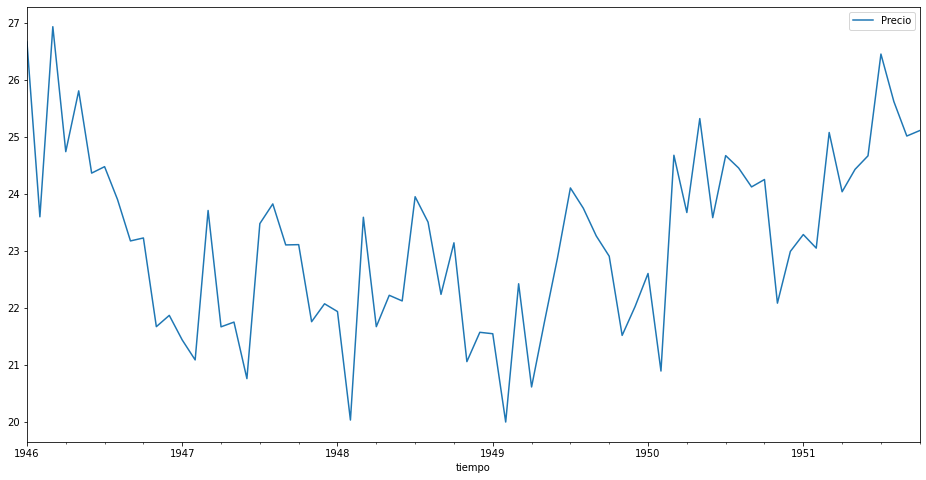

In [6]:
plt.rcParams['figure.figsize'] = (16, 8)
df1[0:(24*5)].plot()
plt.show()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = df1

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

112.77206593207724

ValueError: Length mismatch: Expected axis has 48 elements, new values have 23 elements

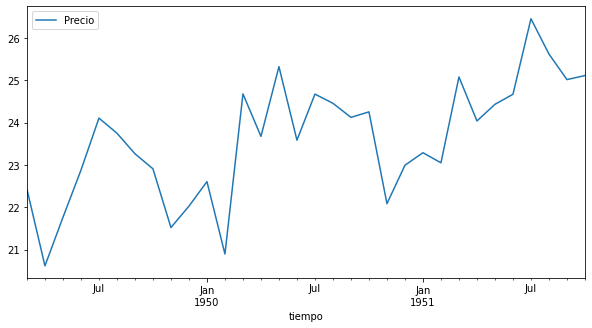

In [8]:
plt.rcParams['figure.figsize'] = (10,5)
# tomar de datos originales 
df_29_31 = df1.loc['1949-03-1':'1951-10-1']
df_29_31.plot()

# agregar bandas de confianza
pred_1_2_conf = results.get_forecast(steps=24*2).conf_int()
pred_1_2_conf.index = pd.date_range(start='1/11/1951', end='1/3/1953', freq='m')[:-1]
x = pd.date_range(start='1/11/1951', end='1/3/1953', freq='m')[:-1]
y1 = pred_1_2_conf['lower Precio']
y2 = pred_1_2_conf['upper Precio']
plt.fill_between(x, y1, y2, alpha=0.6)

# predecir para 1-nov y 2-nov
pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2.index = pd.date_range(start='01/11/1951', end='01/10/1955', freq='m')[:-1]
pred_1_2.plot()

plt.savefig('pronostico.png', dpi=200)
plt.show()

In [9]:
 print(pd.date_range(start='01/11/1951', end='01/10/1955', freq='m')[:-1])

DatetimeIndex(['1951-01-31', '1951-02-28', '1951-03-31', '1951-04-30',
               '1951-05-31', '1951-06-30', '1951-07-31', '1951-08-31',
               '1951-09-30', '1951-10-31', '1951-11-30', '1951-12-31',
               '1952-01-31', '1952-02-29', '1952-03-31', '1952-04-30',
               '1952-05-31', '1952-06-30', '1952-07-31', '1952-08-31',
               '1952-09-30', '1952-10-31', '1952-11-30', '1952-12-31',
               '1953-01-31', '1953-02-28', '1953-03-31', '1953-04-30',
               '1953-05-31', '1953-06-30', '1953-07-31', '1953-08-31',
               '1953-09-30', '1953-10-31', '1953-11-30', '1953-12-31',
               '1954-01-31', '1954-02-28', '1954-03-31', '1954-04-30',
               '1954-05-31', '1954-06-30', '1954-07-31', '1954-08-31',
               '1954-09-30', '1954-10-31', '1954-11-30'],
              dtype='datetime64[ns]', freq='M')


In [10]:
#division de test y train
X_train, x_test = train_test_split(df1, test_size=0.2, random_state=6)
y_train=X_train['Precio']
y_test =x_test['Precio']

In [11]:
X_train.head()

,Precio
tiempo,
1949-06-01,22.874
1951-04-01,24.037
1949-05-01,21.761
1950-07-01,24.671
1946-10-01,23.227
